## Data Transformation

In [208]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 25
pd.options.display.max_columns  = 25
display.expand_frame_repr = True
pd.set_option('display.max_colwidth', -1)

#pd.options.display.width = 80
#pd.set_option('display.html.table_schema', True)

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
sns.set()
sns.set_context('paper')

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

final_dataset = True

if final_dataset:
    inputfile = 'CKME136X10_2018_Clean_Data.csv'
else:
    inputfile = 'CKME136X10_2018_Initial_Data_Cleaned.csv'

outputfile = 'CKME136X10_2018_Data_Cleaned_Transformed.csv'

In [209]:
df = pd.read_csv(inputfile, engine = 'python')
df2 = df.copy()

In [210]:
df = df.astype('category')

In [211]:
df.isnull().sum().sum()

0

In [212]:
df.dtypes

C_MNTH    category
C_WDAY    category
C_HOUR    category
C_VEHS    category
C_CONF    category
C_RCFG    category
C_WTHR    category
C_RSUR    category
C_RALN    category
C_TRAF    category
P_SEX     category
P_AGE     category
P_PSN     category
P_USER    category
P_ISEV    category
dtype: object

In [213]:
print(df.head(5))

  C_MNTH C_WDAY C_HOUR C_VEHS C_CONF C_RCFG C_WTHR C_RSUR C_RALN C_TRAF P_SEX  \
0  1      1      17     3      51     13     1      2      1      1      2      
1  1      1      17     3      51     13     1      2      1      1      2      
2  1      1      12     1      4      13     1      5      3      18     1      
3  1      1      10     1      3      13     1      2      1      18     2      
4  1      1      15     1      51     1      1      1      1      6      2      

  P_AGE P_PSN P_USER P_ISEV  
0  28    11    1      1      
1  21    11    1      1      
2  25    11    1      2      
3  65    11    1      2      
4  17    11    1      1      


### Look at each attribute and transform/normalize data if required

In [214]:
# list of columns to consider
# ['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_VEHS', 'C_CONF', 'C_RCFG',
#    'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE', 'V_YEAR', 
#    'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_SAFE', 'P_USER', 'P_ISEV']

### C_YEAR

In [215]:
if (not final_dataset):
    #Scale very large values down collision year 

    c_year_min = df['C_YEAR'].astype('int').min()
    c_year_max = df['C_YEAR'].astype('int').max()

    print('Vehicle Collision Year (Min): {}'.format(c_year_min))
    print('Vehicle Collision Year (MAX): {}'.format(c_year_max))

    df['C_YEAR'] = df['C_YEAR'].apply(lambda x: (x - c_year_min +1))

    c_year_min = df['C_YEAR'].astype('int').min()
    c_year_max = df['C_YEAR'].astype('int').max()
    print('Vehicle Collision Year (Min): {}'.format(c_year_min))
    print('Vehicle Collision Year (MAX): {}'.format(c_year_max))


### V_YEAR

In [216]:
if (not final_dataset):
    #Scale very large values down collision year 
    v_year_min = df['V_YEAR'].astype('int').min()
    v_year_max = df['V_YEAR'].astype('int').max()

    print('Vehicle Collision Year (Min): {}'.format(v_year_min))
    print('Vehicle Collision Year (MAX): {}'.format(v_year_max))

    df['V_YEAR'] = df['V_YEAR'].apply(lambda x: (x - v_year_min +1))

    v_year_min = df['V_YEAR'].astype('int').min()
    v_year_max = df['V_YEAR'].astype('int').max()
    print('Vehicle Collision Year (Min): {}'.format(v_year_min))
    print('Vehicle Collision Year (MAX): {}'.format(v_year_max))

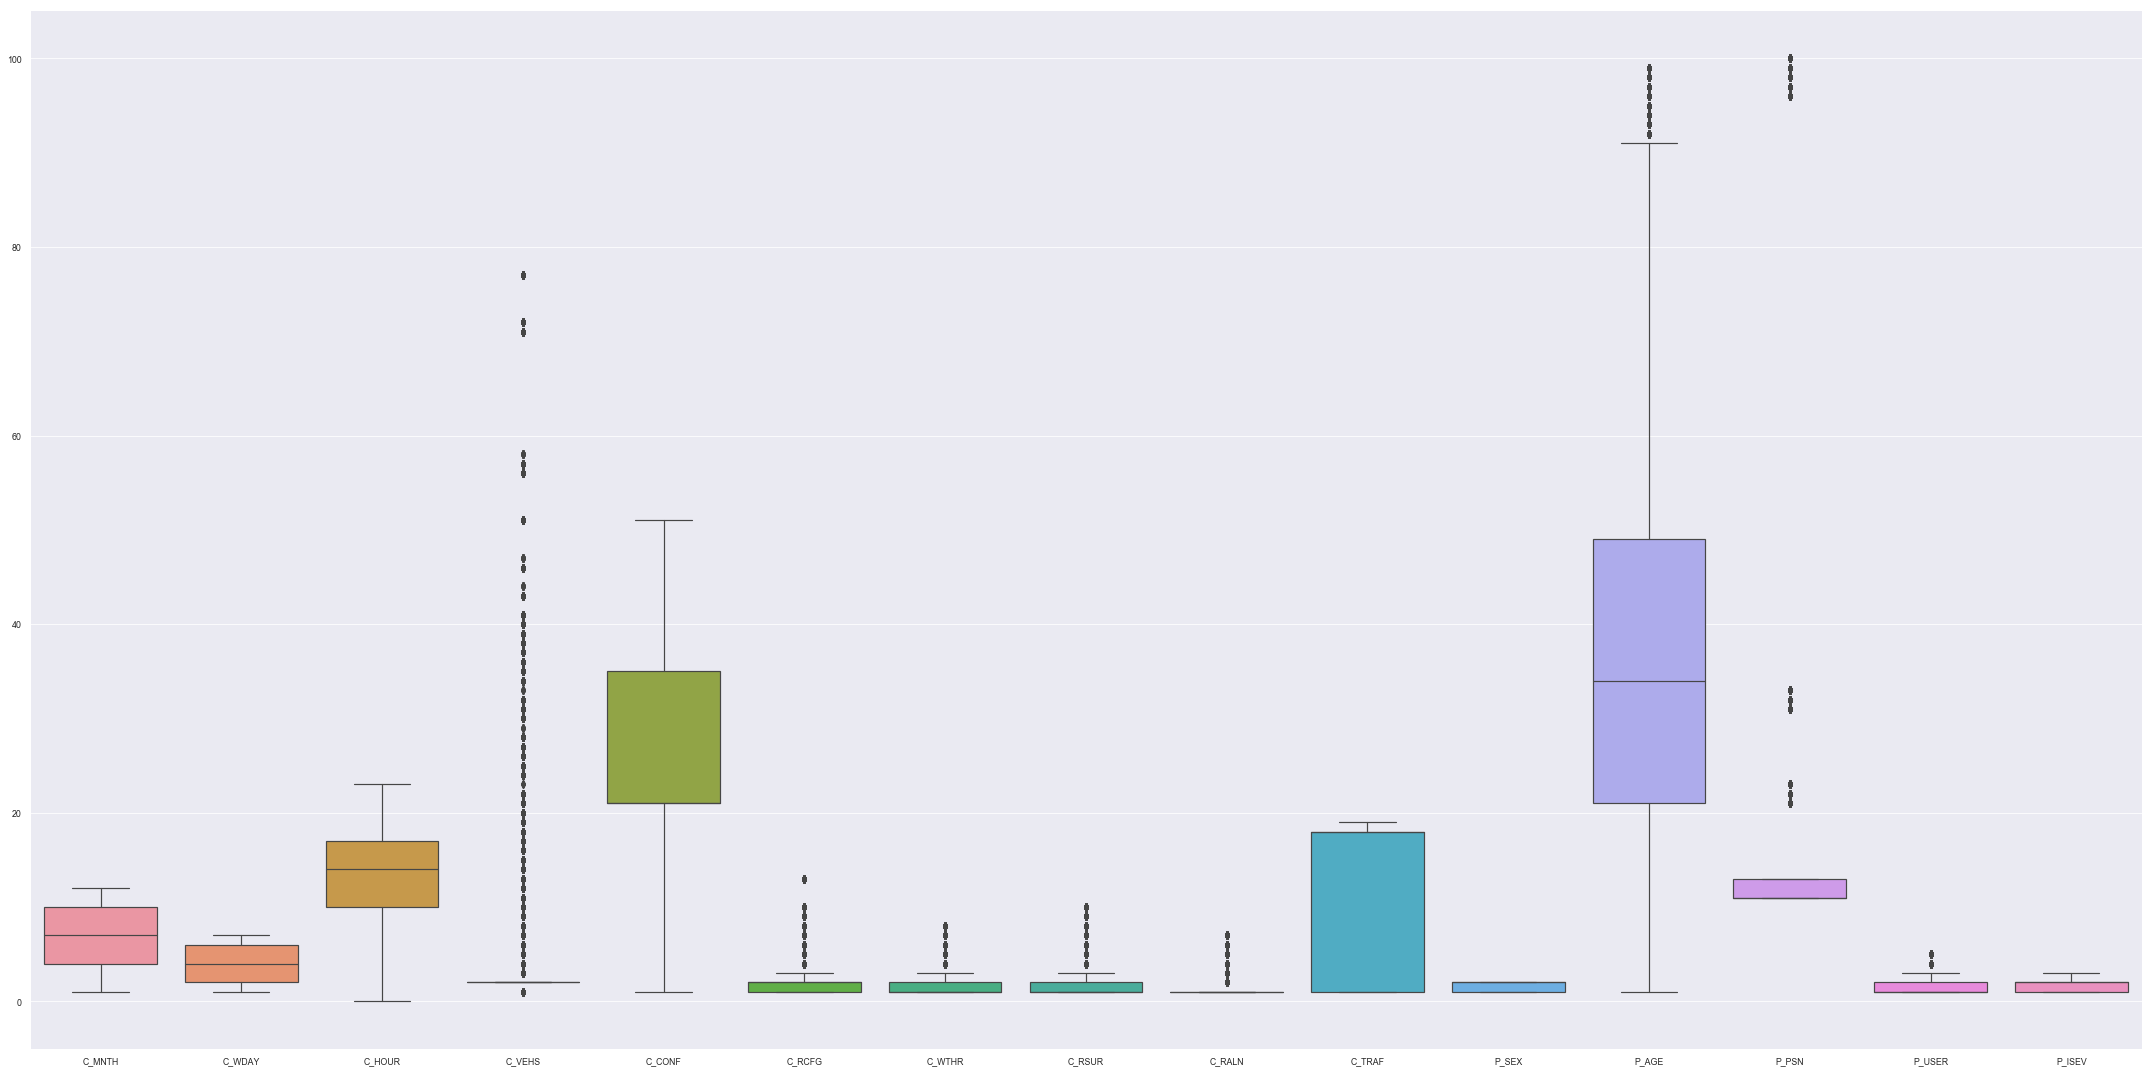

In [217]:
g = sns.catplot(data=df, kind="box", orient="v", height = 15, aspect = 2)
g.set_xticklabels(step=1)
plt.show()

### Create Bins and reduce the number of levels

### Collision Year (C_YEAR)

In [218]:
if (not final_dataset):
    g = sns.catplot("C_YEAR", data=df, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format('C_YEAR'), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel("C_YEAR", fontsize=12)
    plt.show()
    print()
    print("No need to bin, evenly distributed")
    print("Boxplot shows no outliers")

In [219]:
if (not final_dataset):
    df['C_YEAR'].isnull().sum()

In [220]:
if (not final_dataset):
    #drop collision Year, as it should be treated as a identifier column and not as data.
    #For feature prediction, should not depend on previous year information
    df.drop(columns = ['C_YEAR'], inplace = True)

### Collision Month (C_MNTH)

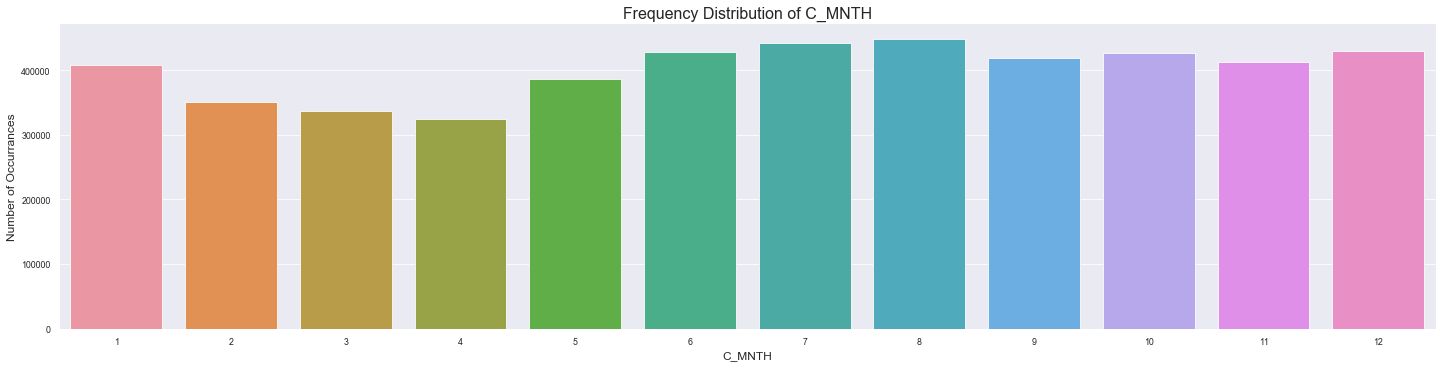


No need to bin, evenly distributed
Boxplot shows no outliers


In [221]:
g = sns.catplot("C_MNTH", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_MNTH"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_MNTH", fontsize=12)
plt.show()
print()
print("No need to bin, evenly distributed")
print("Boxplot shows no outliers")

In [222]:
df['C_MNTH'].isnull().sum()

0

### Collision Day of Week (C_WDAY)

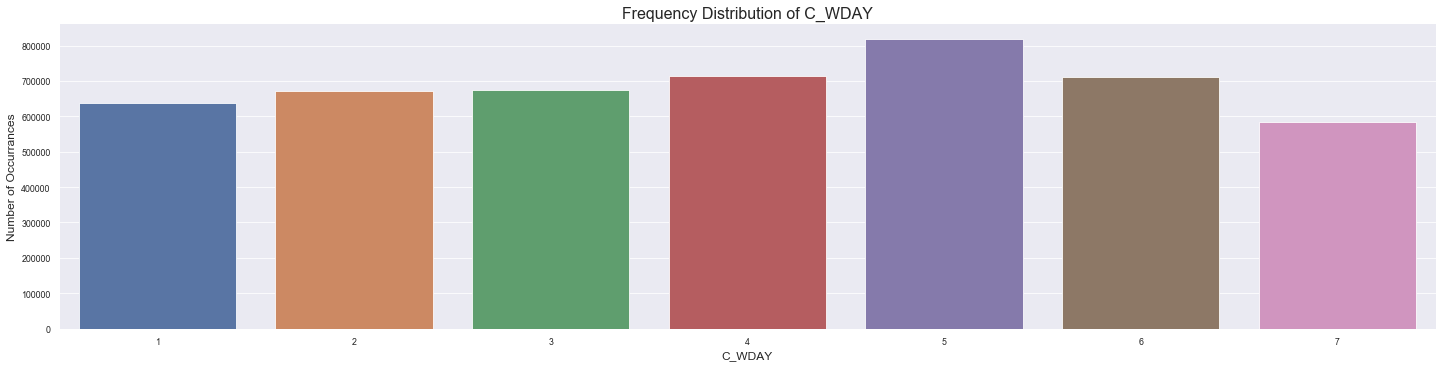


No need to bin, evenly distributed
Boxplot shows no outliers


In [223]:
g = sns.catplot("C_WDAY", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_WDAY"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_WDAY", fontsize=12)
plt.show()
print()
print("No need to bin, evenly distributed")
print("Boxplot shows no outliers")

In [224]:
df['C_WDAY'].isnull().sum()

0

### Collision Hour (C_HOUR)

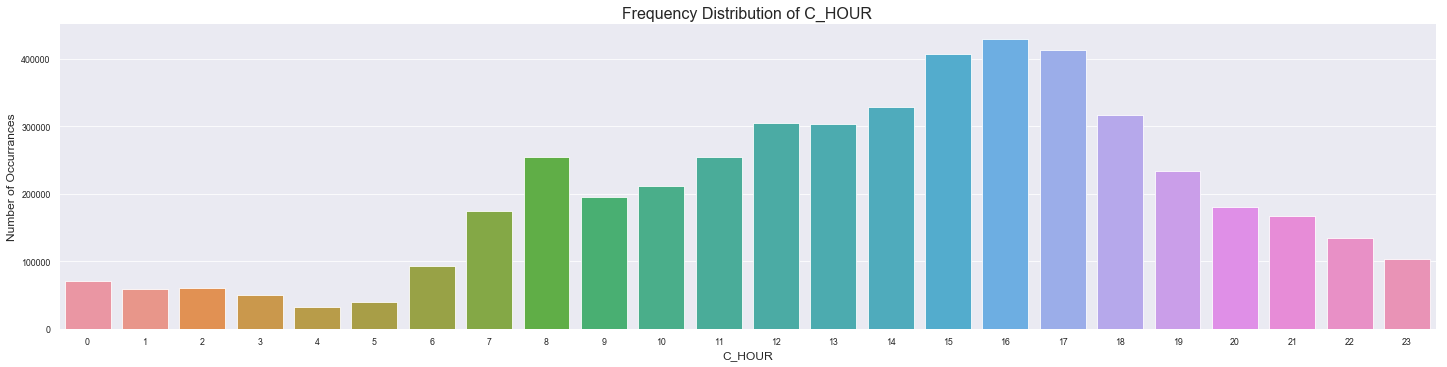

In [225]:
g = sns.catplot("C_HOUR", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_HOUR"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_HOUR", fontsize=12)
plt.show()

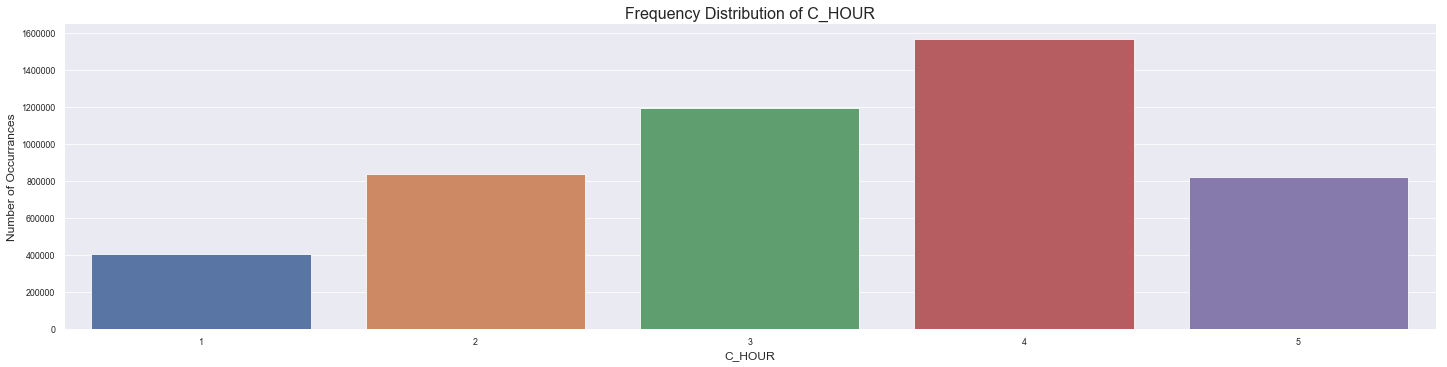

In [226]:
# too many levels, lets bin them as 0: early morning, 1: morning, 2: lunch, 3: afternoon, 4: evening
# early morning: midnight - 5am
# morning: 6am - 10am
# lunch: 11am - 2pm
# afternoon: 3pm - 6pm
# evening: 7pm - midnight - 1min

bins = [0, 6, 10, 14, 18, 24]
labels = [1, 2, 3, 4, 5]
df["C_HOUR"] = pd.cut(df["C_HOUR"], bins=bins, labels = labels, include_lowest = True)

debug = False
if (debug):
    print("a: \t b:")
    for i in range(1, 1000):
        if df["C_HOUR"][i] >= 3:
            print("{} \t {}".format(df2['C_HOUR'][i], df["C_HOUR"][i]))

g = sns.catplot("C_HOUR", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_HOUR"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_HOUR", fontsize=12)
plt.show()

#print("a: \t b:")
#for i in range(1,25):
#    print("{} \t {}".format(a[i], b[i]))

In [227]:
df['C_HOUR'].isnull().sum()

0

### Number of vehicles involved in collision (C_VEHS)

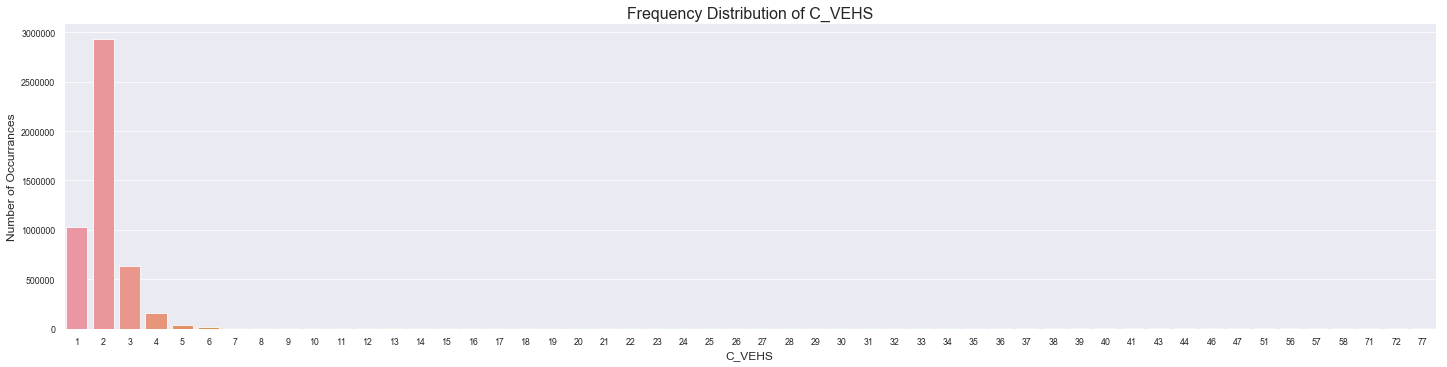

Max # of vehicle in a collion 77


In [228]:
g = sns.catplot("C_VEHS", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_VEHS"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_VEHS", fontsize=12)
plt.show()

print("Max # of vehicle in a collion {}".format(df['C_VEHS'].astype(int).max()))

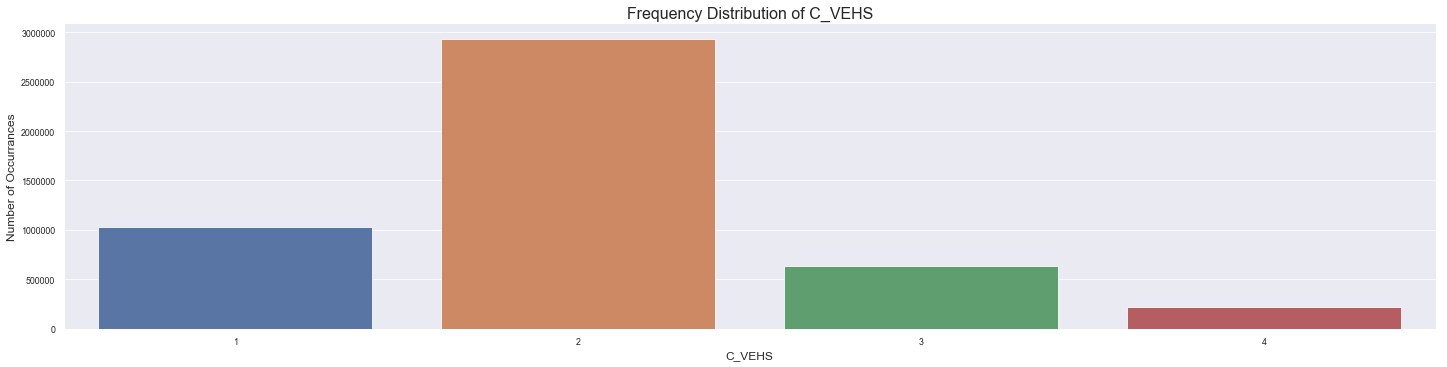

In [229]:
# Too many levels, lets bin them as 1, 2, 3, >=4
bins = [0, 1, 2, 3, 99]
labels = [1, 2, 3, 4]
df["C_VEHS"] = pd.cut(df["C_VEHS"], bins=bins, labels = labels)

g = sns.catplot("C_VEHS", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_VEHS"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_VEHS", fontsize=12)
plt.show()

#print("a: \t b:")
#for i in range(1,len(a)):
#    if a[i] > 3:
#        print("{} \t {}".format(a[i], b[i]))

In [230]:
df['C_VEHS'].isnull().sum()

0

### Collision configuration

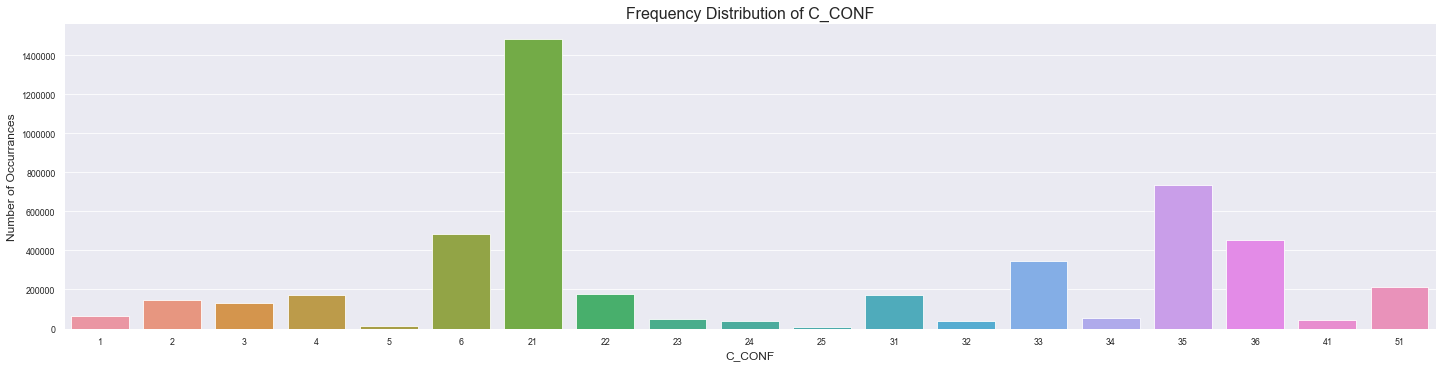


Chi sqare test shows C_CONF having correlation to dependent variable.
In order to prevent any information loss we are going to leave it as is


In [231]:
#Chi sqare test shows C_CONF having correlation to dependent variable.  In order to prevent any information loss we are going to leave it as is
g = sns.catplot("C_CONF", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_CONF"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_CONF", fontsize=12)
plt.show()
print()
print("Chi sqare test shows C_CONF having correlation to dependent variable.")
print("In order to prevent any information loss we are going to leave it as is")

In [232]:
df['C_CONF'].isnull().sum()

0

### Roadway configuration (C_RCFG)

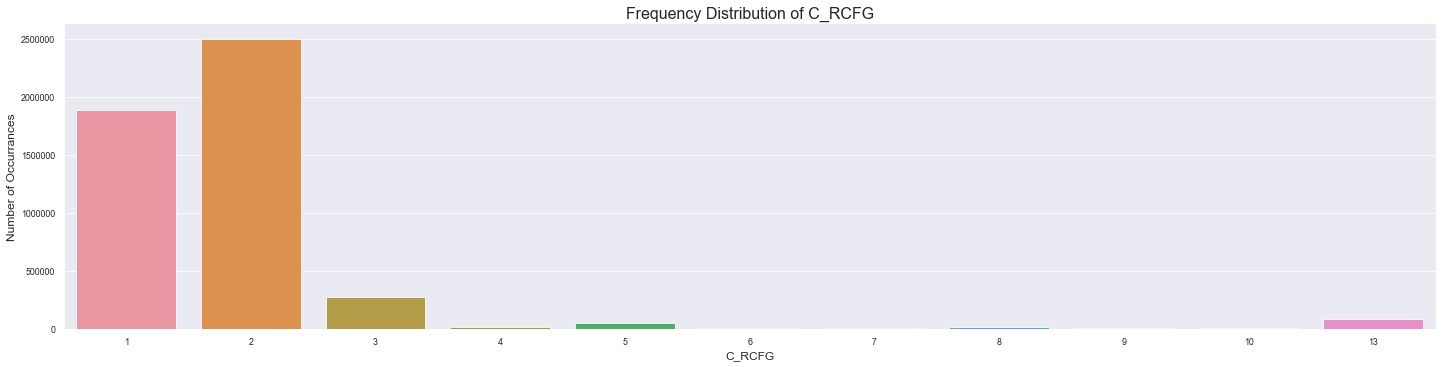

Max # of Roadway Configuration: 13


In [233]:
g = sns.catplot("C_RCFG", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_RCFG"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_RCFG", fontsize=12)
plt.show()
print("Max # of Roadway Configuration: {}".format(df['C_RCFG'].astype('int').max()))

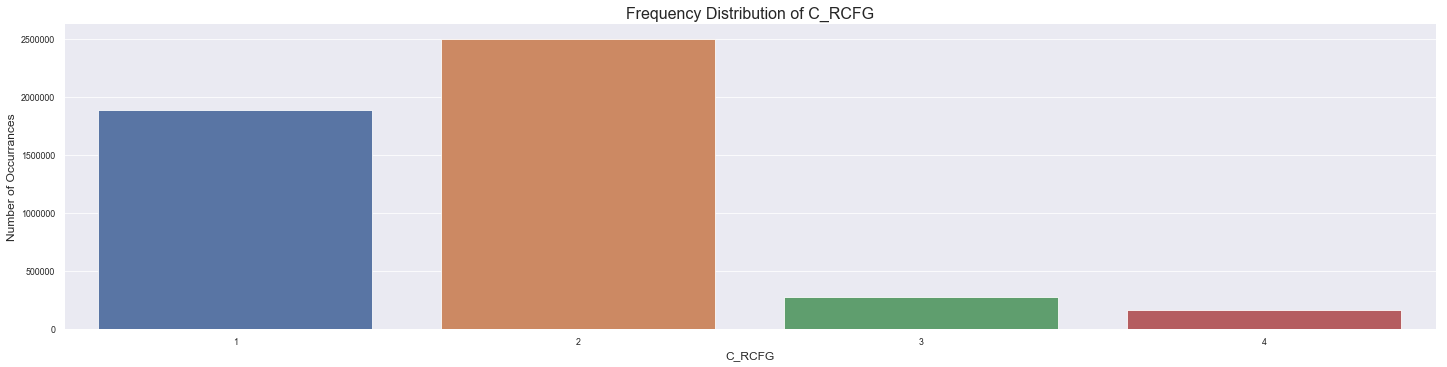

In [234]:
# Too many levels with very little value, lets move configuration 4 - 10 into a single bin
#01:Non-intersection (mid-block)
#02:At an intersection of at least two public roadways
#03:Intersection with parking lot entrance/exit, private driveway or laneway
#04:All other configuraiton

# Too many levels, lets bin them as 1, 2, 3, >4
bins = [0, 1, 2, 3, 13]
labels = [1, 2, 3, 4]
df["C_RCFG"] = pd.cut(df["C_RCFG"], bins=bins, labels = labels)

debug = False
if (debug):
    print("a: \t b:")
    for i in range(1,len(df["C_RCFG"])):
        if df["C_RCFG"][i] >= 3:
            print("{} \t {}".format(df2['C_RCFG'][i], df["C_RCFG"][i]))

g = sns.catplot("C_RCFG", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_RCFG"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_RCFG", fontsize=12)
plt.show()

In [235]:
df['C_RCFG'].isnull().sum()

0

### Weather condition (C_WTHR)

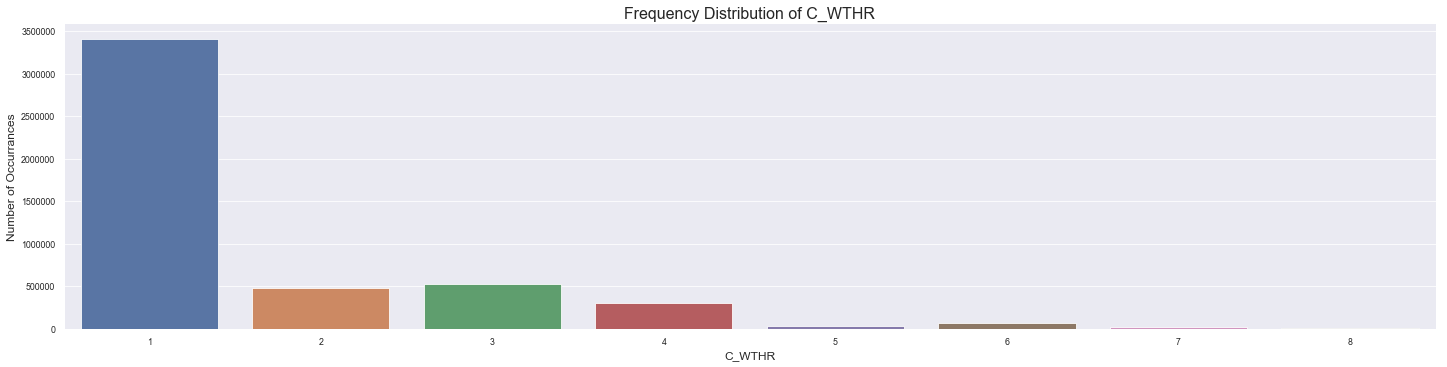

In [236]:
g = sns.catplot("C_WTHR", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_WTHR"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_WTHR", fontsize=12)
plt.show()

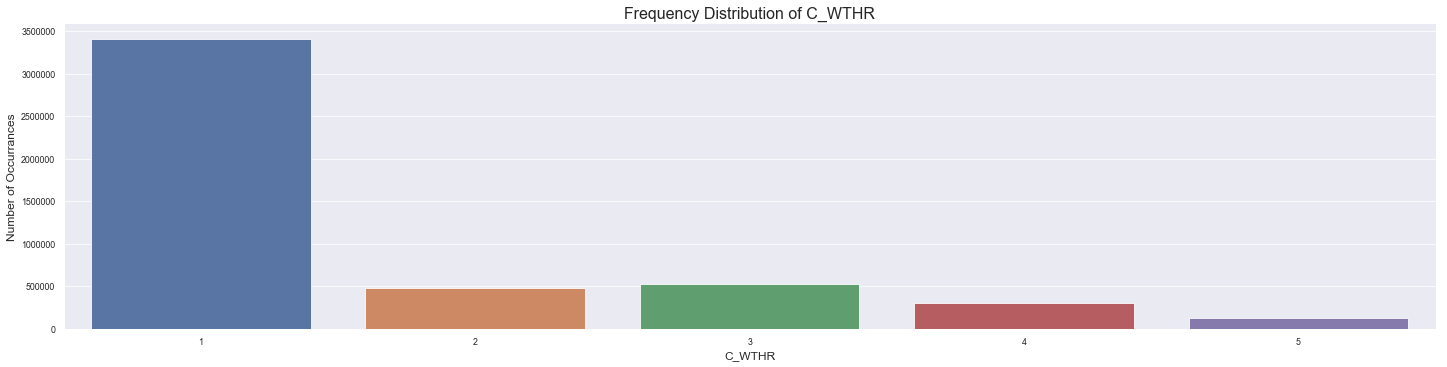

In [237]:
# Box plot shows that some values are considered outliers.  Since 5 (Freezing Rain/hail), 
# 6 (poor visibility) and 7(strong wind) can be considered as server weather, we will
# group them into one category

#1: Clear and sunny
#2: Overcast, cloudy but no precipitation
#3: Raining
#4: Snowing, not including drifting snow
#5: Sever Weather

# Too many levels, lets bin them as 1, 2, 3, >5
bins = [0, 1, 2, 3, 4, 8]
labels = [1, 2, 3, 4, 5]
df["C_WTHR"] = pd.cut(df["C_WTHR"], bins=bins, labels = labels)

debug = False
if (debug):
    print("a: \t b:")
    for i in range(1,len(df["C_WTHR"])):
        if df["C_WTHR"][i] >= 4:
            print("{} \t {}".format(df2['C_WTHR'][i], df["C_WTHR"][i]))

g = sns.catplot("C_WTHR", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_WTHR"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_WTHR", fontsize=12)
plt.show()

In [238]:
df['C_WTHR'].isnull().sum()

0

### Road surface (C_RSUR)

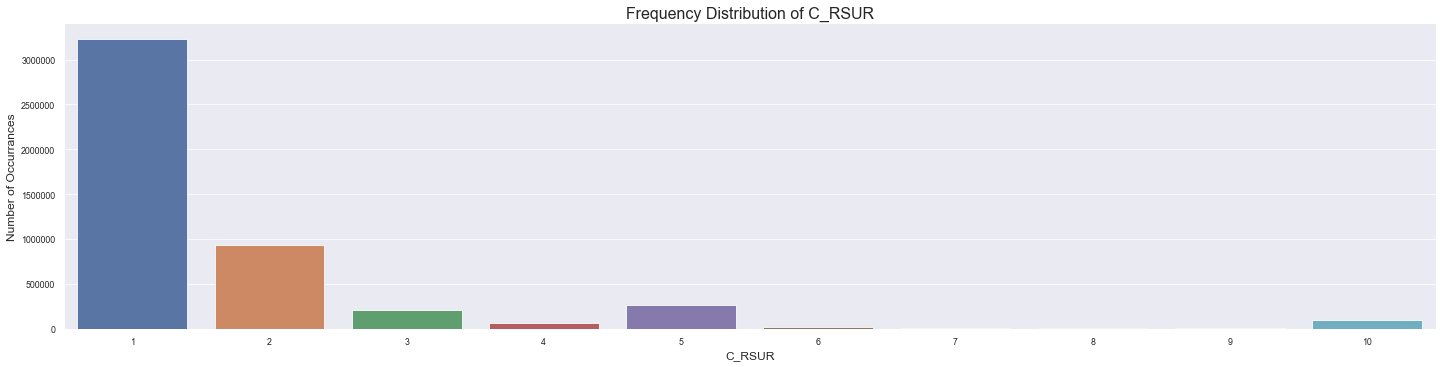

In [239]:
g = sns.catplot("C_RSUR", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_RSUR"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_RSUR", fontsize=12)
plt.show()

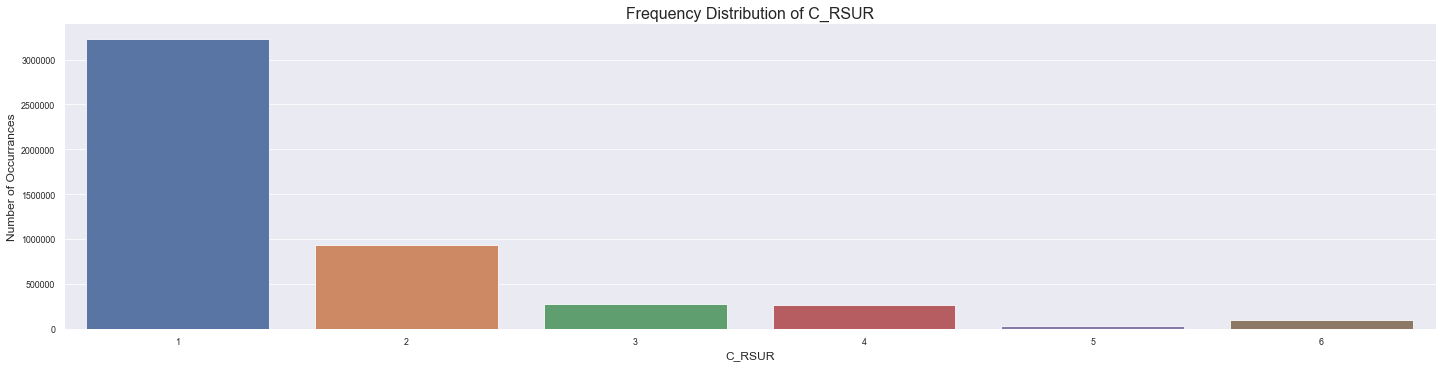

In [240]:
# Very few observations for Sand, Muddy, Oil, Flooded, lets merge them into one category "other"
# Lets merge snow and wet snow into the one as well.
#1: Dry, normal
#2: Wet
#3: Snow (fresh, loose snow, Slush ,wet snow)
#4: Icy
#5: Other (Sand, Muddy, Oil, Flooded)

bins = [0, 1, 2, 4, 5, 9, 10]
labels = [1, 2, 3, 4, 5, 6]

df["C_RSUR"] = pd.cut(df["C_RSUR"], bins=bins, labels = labels)

debug = False
if (debug):
    print("a: \t b:")
    for i in range(1, len(df["C_RSUR"])):
        if df["C_RSUR"][i] > 3:
            print("{} \t {}".format(df2['C_RSUR'][i], df["C_RSUR"][i]))

g = sns.catplot("C_RSUR", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_RSUR"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_RSUR", fontsize=12)
plt.show()

In [241]:
df['C_RSUR'].isnull().sum()

0

### Road alignment (C_RALN)

Text(0.5,6.368,'C_RALN')

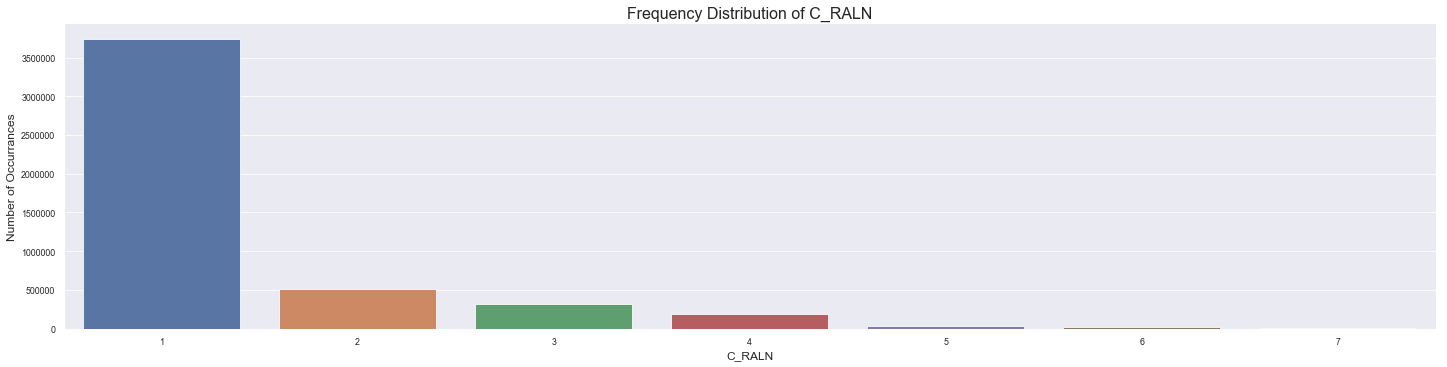

In [242]:
g = sns.catplot("C_RALN", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_RALN"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_RALN", fontsize=12)
#plt.show()

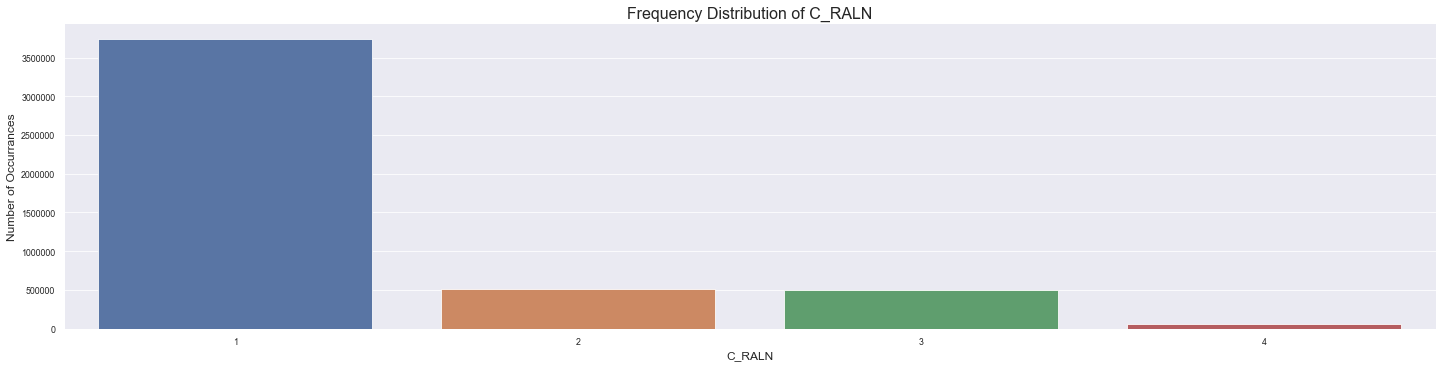

In [243]:
# lets merge curved sections into one (section 3 and 4)
# lets merge section 5 and 6 as others
#1:Straight and level
#2:Straight with gradient
#3:Curved and level, Curved with gradient
#4:Other (Top of hill or gradient, Bottom of hill or gradient)

bins = [0, 1, 2, 4, 7]
labels = [1, 2, 3, 4]

df["C_RALN"] = pd.cut(df["C_RALN"], bins=bins, labels = labels)

debug = False
if (debug):
    print("a: \t b:")
    for i in range(1, len(df["C_RALN"])):
        if df["C_RALN"][i] > 3:
            print("{} \t {}".format(df2['C_RALN'][i], df["C_RALN"][i]))

g = sns.catplot("C_RALN", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_RALN"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_RALN", fontsize=12)
plt.show()


In [244]:
df['C_RALN'].isnull().sum()

0

### Traffic control (C_TRAF)

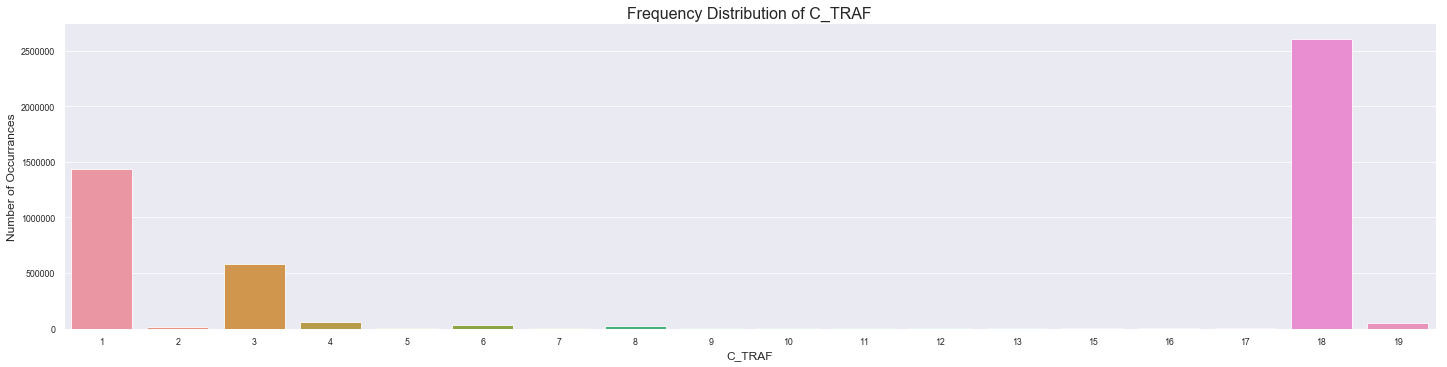

In [245]:
g = sns.catplot("C_TRAF", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_TRAF"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_TRAF", fontsize=12)
plt.show()

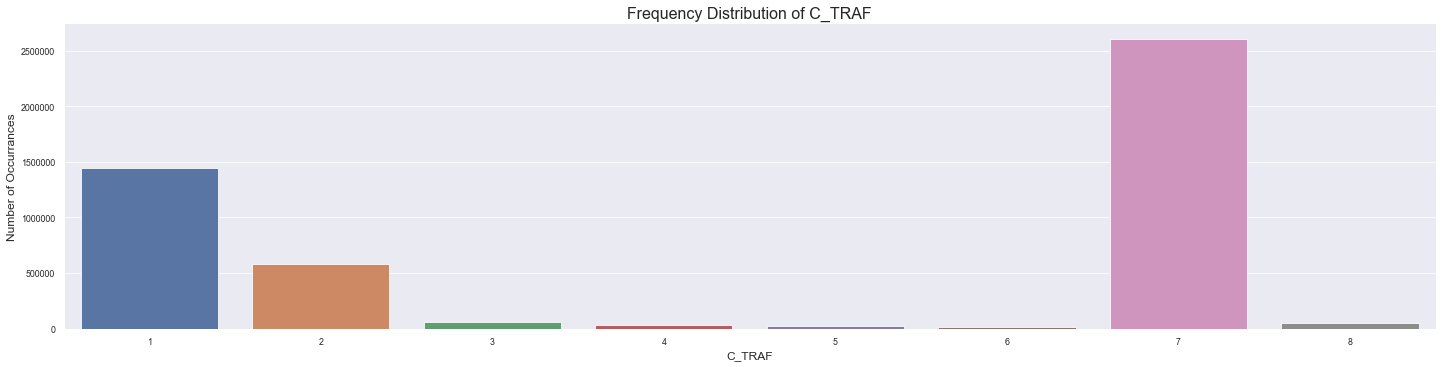

In [246]:
#Chi square test marked it as having correlation with dependent variable.
#We still see many configuraiton with little value. Lets merge some of them together.

#01: Traffic signals fully operational
#02: Traffic signals in flashing mode
#03: Stop sign
#04: Yield sign
#05: Warning sign	Yellow diamond shape sign
#06	Pedestrian crosswalk	
#07	Police officer	
#08	School guard, flagman	
#09:School crossing
#10:Reduced speed zone
#11:No passing zone sign
#12:Markings on the road	e.g. no passing
#13:School bus stopped with school bus signal lights flashing
#14:School bus stopped with school bus signal lights not flashing
#15:Railway crossing with signals, or signals and gates
#16:Railway crossing with signs only
#17:Control device not specified
#18	No control present

#1-2: merge as Traffic Signals
#4-5: Proceed with Care
#7-8: Enforcement office on duty
#9-17: merge as other


bins = [0, 2, 3, 5, 6, 8, 17, 18, 19]
labels = [1, 2, 3, 4, 5, 6, 7, 8]

df["C_TRAF"] = pd.cut(df["C_TRAF"], bins=bins, labels = labels)

debug = False
if (debug):
    print("a: \t b:")
    for i in range(1, len(df["C_TRAF"])):
        if df["C_TRAF"][i] > 3:
            print("{} \t {}".format(df2['C_TRAF'][i], df["C_TRAF"][i]))

g = sns.catplot("C_TRAF", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("C_TRAF"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("C_TRAF", fontsize=12)
plt.show()


In [247]:
df['C_TRAF'].isnull().sum()

0

### Vehicle type (V_TYPE)

In [248]:
if (not final_dataset):
    g = sns.catplot("V_TYPE", data=df, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format("V_TYPE"), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel("V_TYPE", fontsize=12)
    plt.show()

In [249]:
if (not final_dataset):
    df['V_TYPE'].isnull().sum()

In [250]:
if (not final_dataset):
    #Low variance filter
    df.drop(columns = ['V_TYPE'], inplace = True)

### Vehicle model year (V_YEAR)

In [251]:
if (not final_dataset):
    g = sns.catplot("V_YEAR", data=df, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format("V_YEAR"), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel("V_YEAR", fontsize=12)
    plt.show()

In [252]:
if (not final_dataset):
    # way too many levels
    #2: 1900 - 1989
    #3: 1990 - 1999
    #4: 2000 - 2009
    #5: 2010 - 2017
    
    bins = [0,1, 89, 99, 109, 119]
    labels = [1, 2, 3, 4, 5]
    df["V_YEAR"] = pd.cut(df["V_YEAR"], bins=bins, labels = labels)
    
    g = sns.catplot("V_YEAR", data=df, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format("V_YEAR"), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel("V_YEAR", fontsize=12)
    plt.show()

In [253]:
if (not final_dataset):
    df['V_YEAR'].isnull().sum()

In [254]:
if (not final_dataset):
    #column contains large amount dumy variables which is not a vehicle.
    df.drop(columns = ['V_YEAR'], inplace = True)

### Person sex (P_SEX)

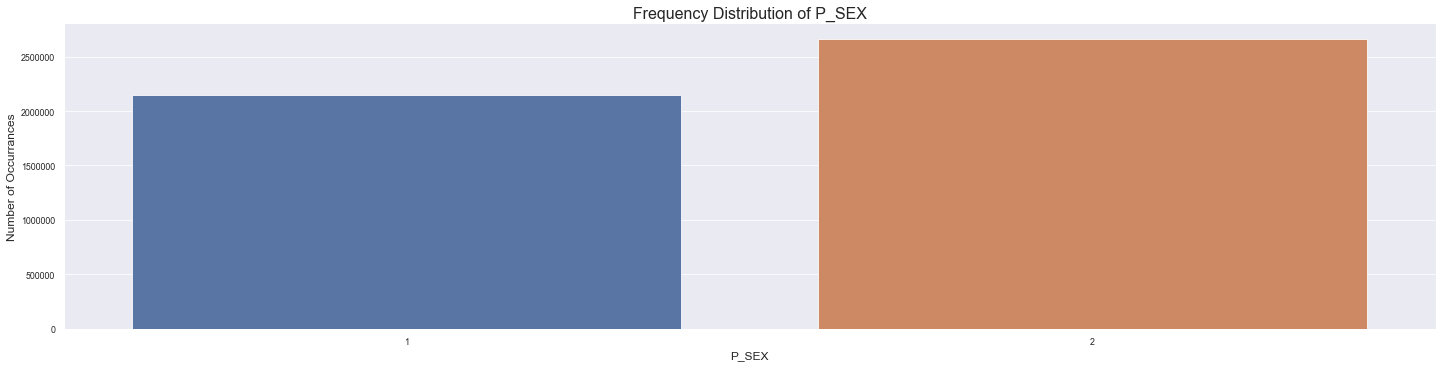

In [255]:
g = sns.catplot("P_SEX", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("P_SEX"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("P_SEX", fontsize=12)
plt.show()

In [256]:
df['P_SEX'].isnull().sum()

0

### Person Age (P_AGE)

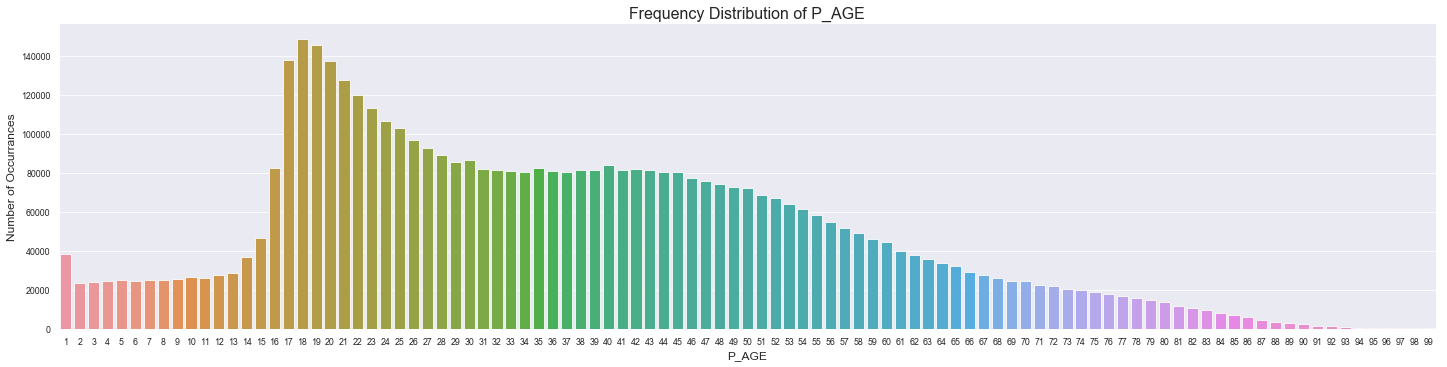

In [257]:
# Numeric variable, we will normalize it later
g = sns.catplot("P_AGE", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("P_AGE"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("P_AGE", fontsize=12)
plt.show()

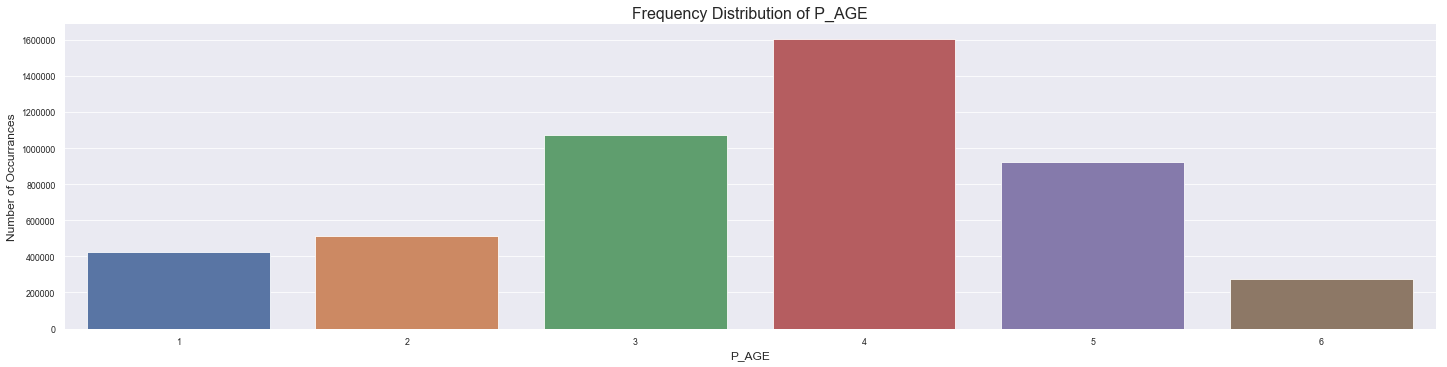

In [258]:
#learning algorithms are taking too long with floating point calcuations, lets group by age

#1: 0 - 15 kids
#2: 16 - 19 Yong drivers
#3: 20 - 29
#4: 30 - 49
#5: 50 - 69
#6: 70 - 70+

bins = [0,15, 19, 29, 49, 69, 100]
labels = [1, 2, 3, 4, 5, 6]
df["P_AGE"] = pd.cut(df["P_AGE"], bins=bins, labels = labels, include_lowest = True)

g = sns.catplot("P_AGE", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("P_AGE"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("P_AGE", fontsize=12)
plt.show()

In [259]:
df['P_AGE'].isnull().sum()

0

In [260]:
df.dtypes

C_MNTH    category
C_WDAY    category
C_HOUR    category
C_VEHS    category
C_CONF    category
C_RCFG    category
C_WTHR    category
C_RSUR    category
C_RALN    category
C_TRAF    category
P_SEX     category
P_AGE     category
P_PSN     category
P_USER    category
P_ISEV    category
dtype: object

In [261]:
# normalize the data
#df = df.astype('category')
#df['P_AGE'] = df['P_AGE'].astype('float64')
#df['P_PSN'] = df['P_PSN'].astype('int')
#mms = MinMaxScaler()
#df[['P_AGE']] = mms.fit_transform(df[['P_AGE']])

### Person position (P_PSN)

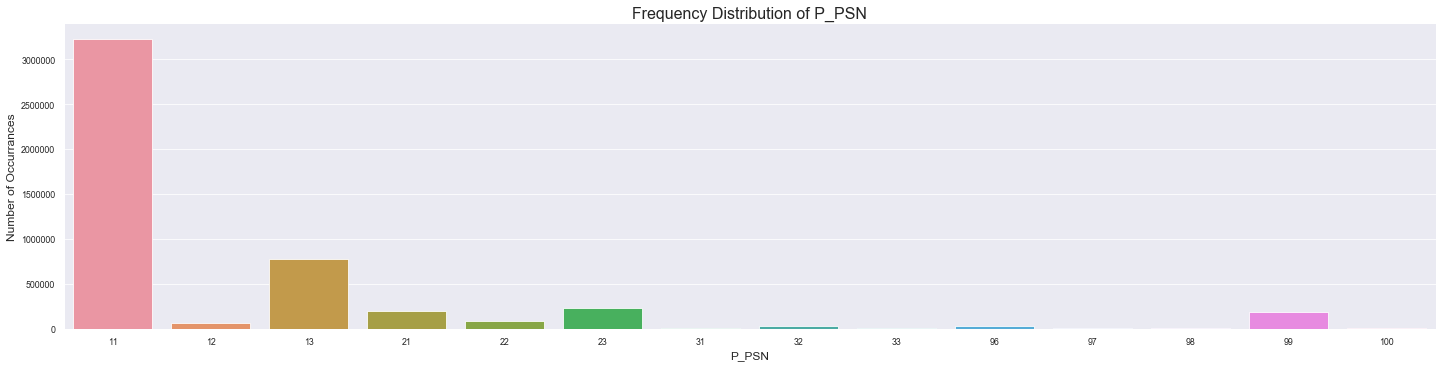

In [262]:
g = sns.catplot("P_PSN", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("P_PSN"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("P_PSN", fontsize=12)
plt.show()

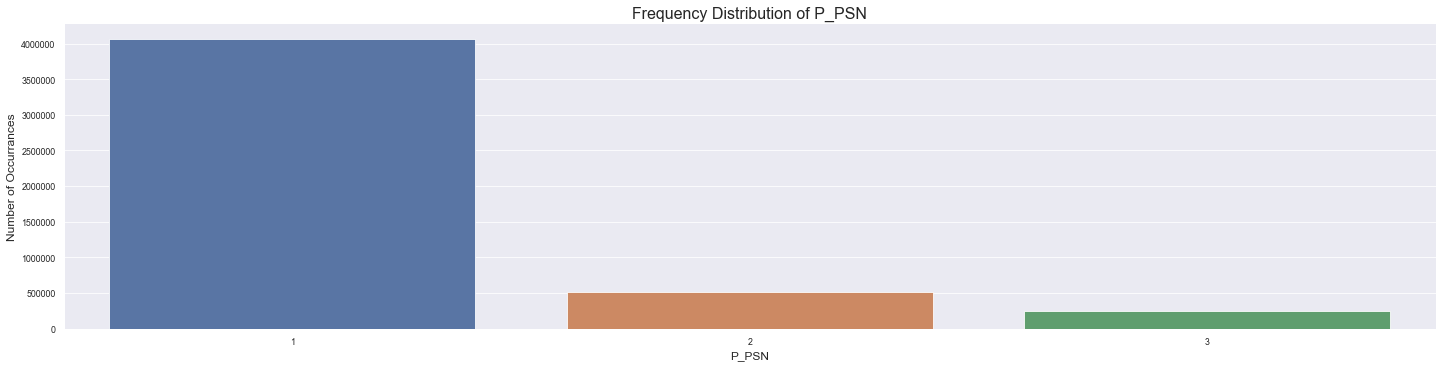

In [263]:
#11 Driver
#12 Front row, center
#13 Front row, right outboard, including motorcycle passenger in sidecar
#21 Second row, left outboard, including motorcycle passenger
#22 Second row, center
#23 Second row, right outboard
#31 Third row, left outboard
#32 Third row, center
#33 Third row, right outboard
#.. etc.
#96 Position unknown, but the person was definitely an occupant
#97 Sitting on someone’s lap
#98 Outside passenger compartment
#99 Pedestrian

#new mapping
#1: First Row
#2: Second Row
#3: All other rows

bins = [0, 19, 29, 100]
labels = [1, 2, 3]
df["P_PSN"] = pd.cut(df["P_PSN"], bins=bins, labels = labels)

g = sns.catplot("P_PSN", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("P_PSN"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("P_PSN", fontsize=12)
plt.show()


In [264]:
df['P_PSN'].isnull().sum()

0

### Safety device used (P_SAFE)

In [265]:
if (not final_dataset):
    g = sns.catplot("P_SAFE", data=df, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format("P_SAFE"), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel("P_SAFE", fontsize=12)
    plt.show()

In [266]:
if (not final_dataset):
    bins = [0, 1, 2, 9, 12, 13, 15, 16]
    labels = [1, 2, 3, 4, 5, 6, 7]
    df["P_SAFE"] = pd.cut(df["P_SAFE"], bins=bins, labels = labels)
    
    g = sns.catplot("P_SAFE", data=df, kind="count", legend = True, height = 5, aspect = 4)
    g.set_xticklabels(step=1)
    plt.title('Frequency Distribution of {0}'.format("P_SAFE"), fontsize=16)
    plt.ylabel('Number of Occurrances', fontsize=12)
    plt.xlabel("P_SAFE", fontsize=12)
    plt.show()

In [267]:
if (not final_dataset):
    df['P_SAFE'].isnull().sum()

In [268]:
if (not final_dataset):
    #low variace filter, let drop this column
    df.drop(columns = ['P_SAFE'], inplace = True)

### Road user class (P_USER)

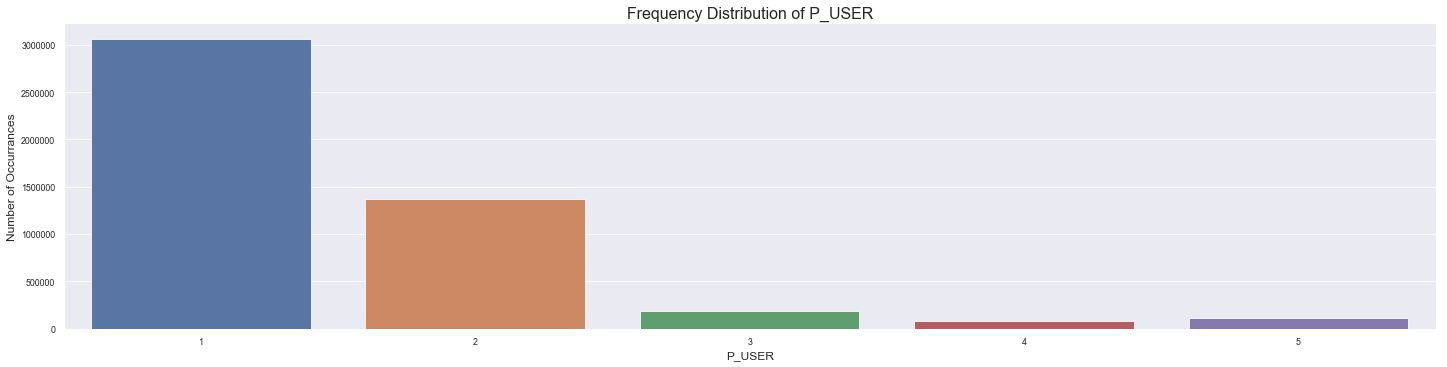

In [269]:
g = sns.catplot("P_USER", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("P_USER"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("P_USER", fontsize=12)
plt.show()

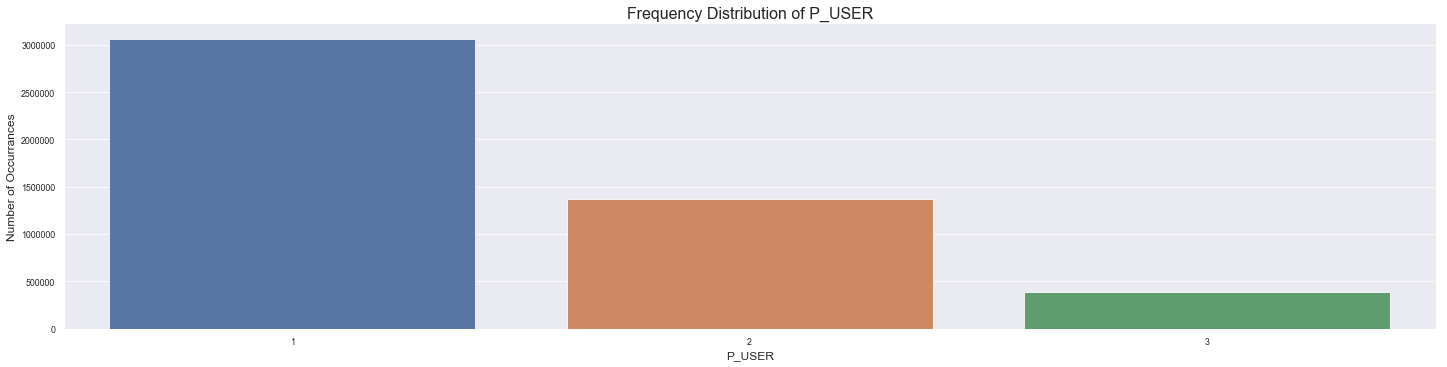

In [270]:
#1 Motor Vehicle Driver
#2 Motor Vehicle Passenger
#3 Pedestrian
#4 Bicyclist
#5 Motorcyclist

#New Mapping
#1 Motor Vehicle Driver
#2 Motor Vehicle Passenger
#3 Other

bins = [0, 1, 2, 5]
labels = [1, 2, 3]
df["P_USER"] = pd.cut(df["P_USER"], bins=bins, labels = labels)

g = sns.catplot("P_USER", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("P_USER"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("P_USER", fontsize=12)
plt.show()

In [271]:
df['P_USER'].isnull().sum()

0

### Medical treatment required (P_ISEV)

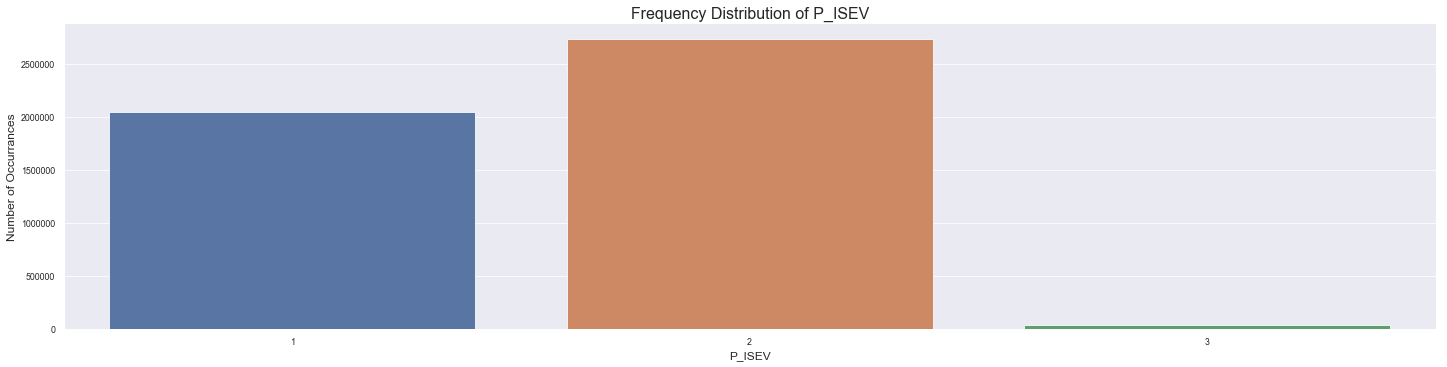

In [272]:
# for completness include the Class variable
#1 No Injury
#2 Injury and Fatality (Died immediately or within the time limit.)



g = sns.catplot("P_ISEV", data=df, kind="count", legend = True, height = 5, aspect = 4)
g.set_xticklabels(step=1)
plt.title('Frequency Distribution of {0}'.format("P_ISEV"), fontsize=16)
plt.ylabel('Number of Occurrances', fontsize=12)
plt.xlabel("P_ISEV", fontsize=12)
plt.show()

In [273]:
df['P_ISEV'].isnull().sum()

0

### Boxplot after binning

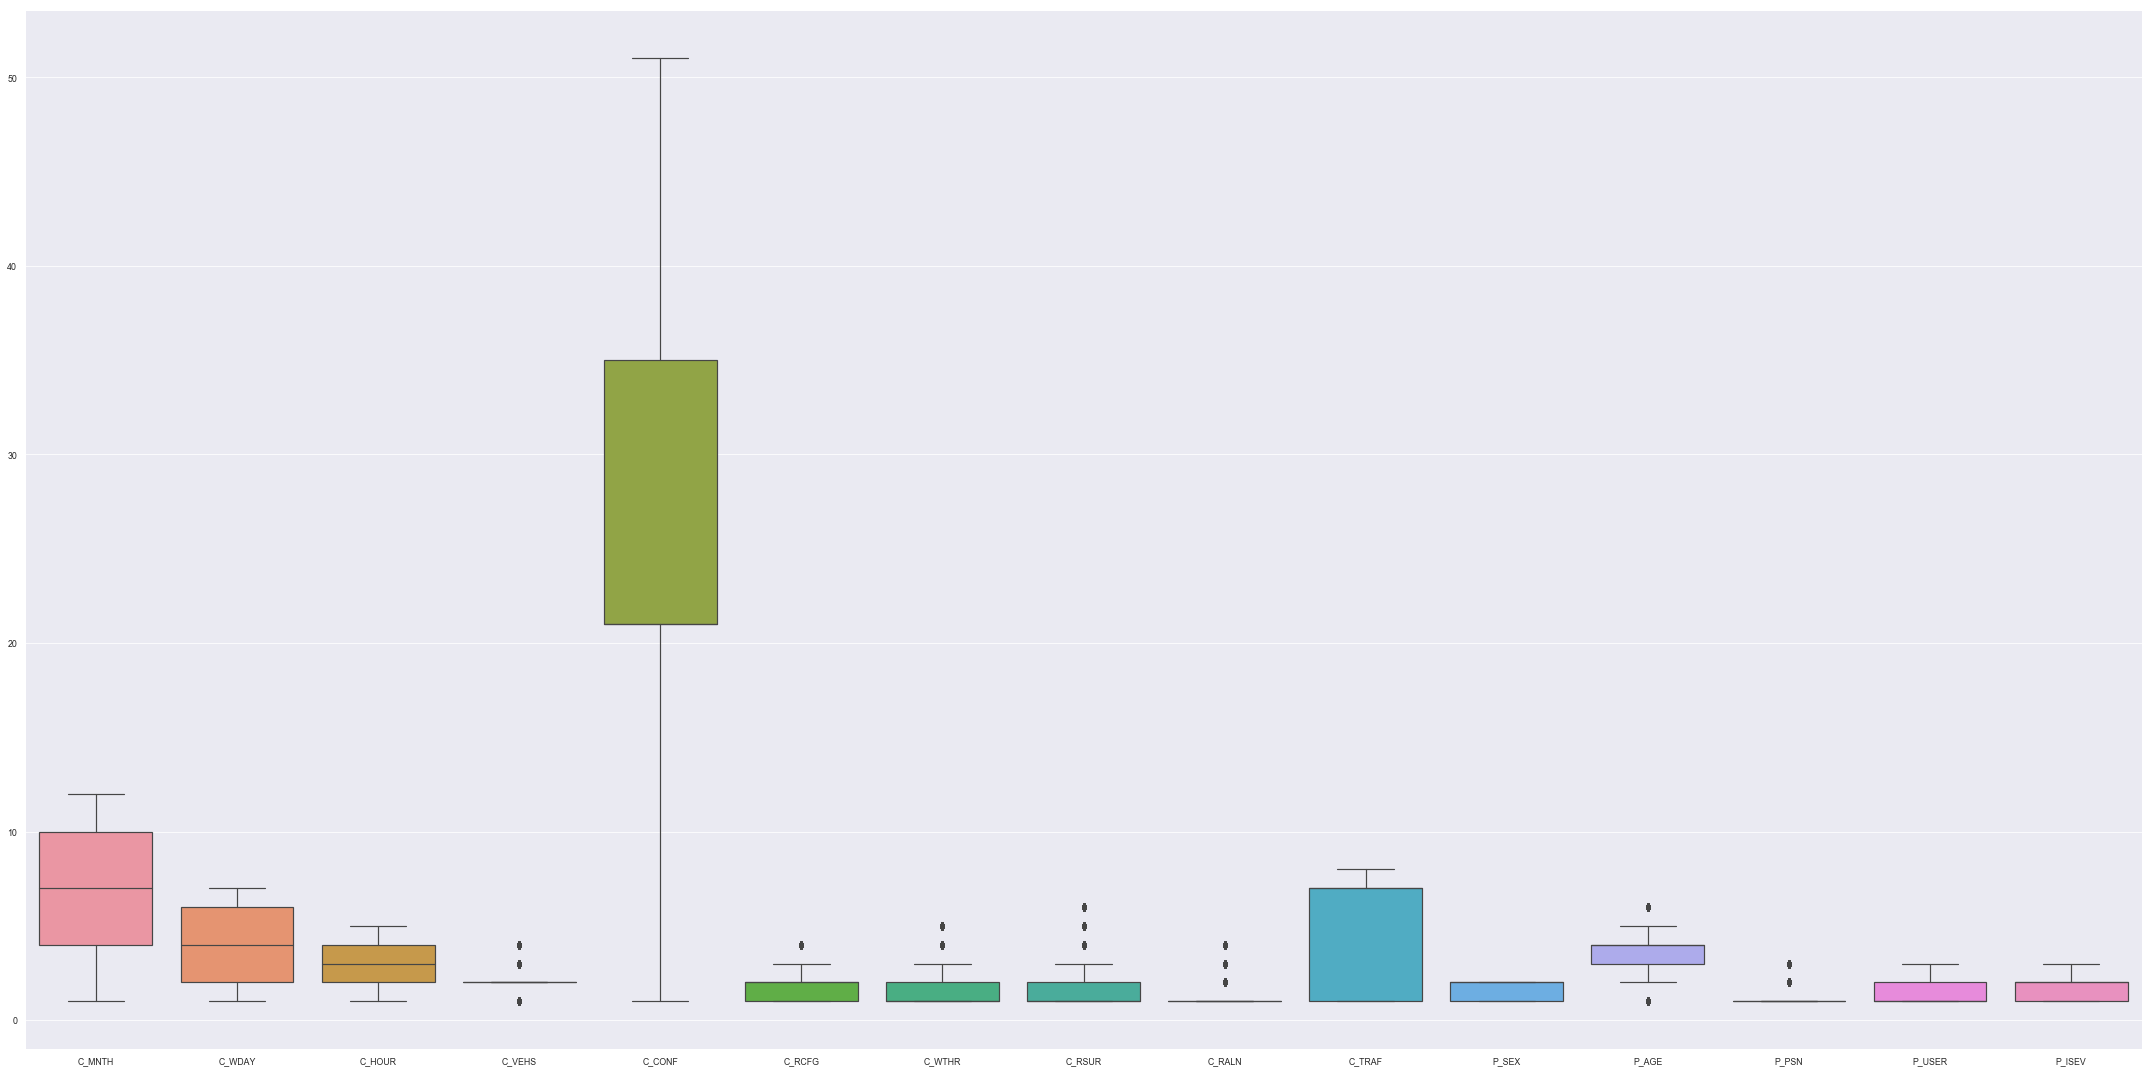

In [274]:
g = sns.catplot(data=df, kind="box", orient="v", height = 15, aspect = 2)
g.set_xticklabels(step=1)
plt.show()

In [275]:
df.to_csv(outputfile, encoding='utf-8', index=False)